<a href="https://colab.research.google.com/github/Cyrus-White/HW-Project-Files-/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

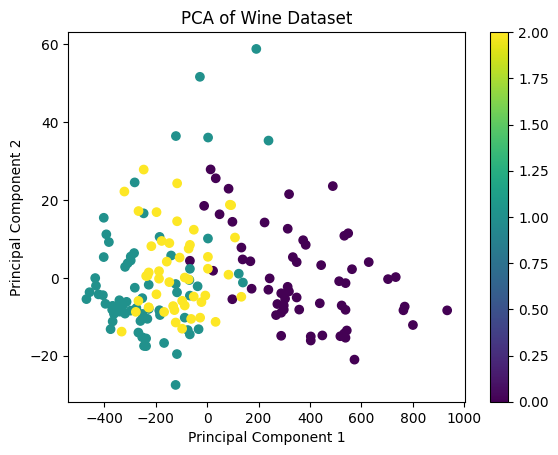

Explained variance ratio: [0.99809123 0.00173592]


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target labels

# Apply PCA and reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wine Dataset')
plt.colorbar()
plt.show()

# Output explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")


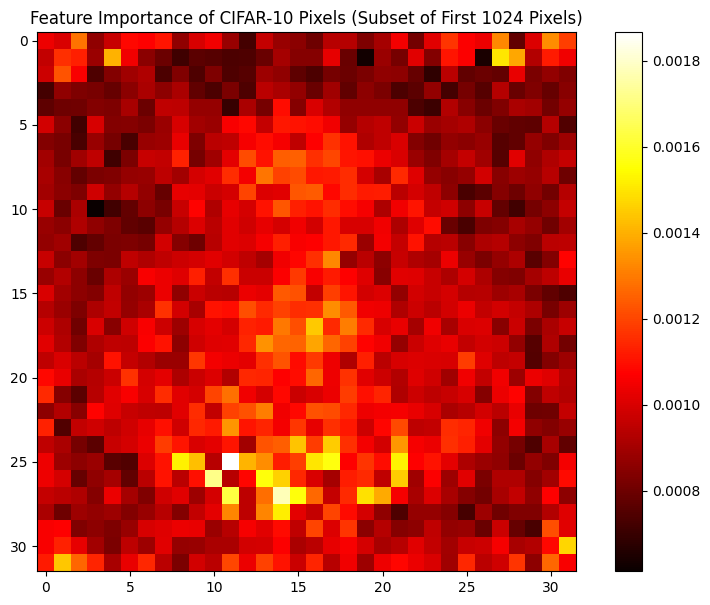

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the CIFAR-10 dataset
cifar10 = fetch_openml('cifar_10', version=1)

# Preprocess the dataset
X = np.array(cifar10.data)  # Image data (3072 features per image)
y = np.array(cifar10.target)  # Labels

# Reduce dimensionality by sampling a subset of features
X = X[:, :1024]  # For example, using just the first 1024 pixels (32x32 image, 1 channel)

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest classifier with fewer trees and parallelization
rf = RandomForestClassifier(n_estimators=20, random_state=42, n_jobs=-1)  # n_jobs=-1 uses all cores
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Reshape the importances back to the shape of the image (32x32x3)
importances_reshaped = feature_importances.reshape(32, 32)

# Plot the feature importances (the importance of each pixel)
plt.figure(figsize=(10, 7))
plt.imshow(importances_reshaped, cmap='hot')
plt.colorbar()
plt.title("Feature Importance of CIFAR-10 Pixels (Subset of First 1024 Pixels)")
plt.show()


Data loaded successfully.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.6104
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1460
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0314
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0285
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0281
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0271
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0221
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0216
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0190
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0192
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0135
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0156
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0154
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0155
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0137
Epoch 16/50
25/25 ━━━━

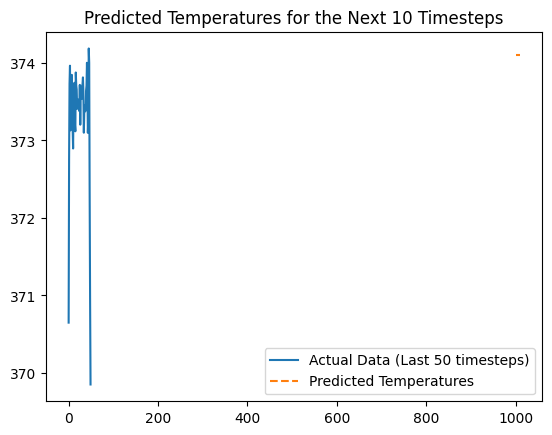

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Step 1: Load the surface temperature data from the uploaded file in session storage
file_path = '/content/surface_temp.npy'  # Default path for uploaded files in Colab

# Load the surface temperature data
try:
    data = np.load(file_path)  # Load the temperature data for 1000 timesteps
    print("Data loaded successfully.")
except FileNotFoundError:
    print(f"File not found at {file_path}. Please verify the file name.")

# Step 2: Preprocess the data
# Normalize the data to the range [0, 1] using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))  # Reshaping for scaler

# Prepare data for the RNN model (create sequences of 10 time steps)
sequence_length = 10
X, y = [], []

# Create sequences of 'sequence_length' timesteps as features (X) and the next timestep as the label (y)
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Step 3: Split the data into training and testing sets (80%-20% split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build the RNN model using LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))  # 50 LSTM units
model.add(Dense(1))  # Output layer with 1 neuron (for predicting the next temperature)
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Step 6: Predict the next 10 timesteps (on the last sequence in the test set)
predictions = model.predict(X_test[-1].reshape(1, sequence_length, 1))

# Step 7: Invert predictions to the original scale of the temperature data
predictions_inverted = scaler.inverse_transform(predictions)

# Since we are predicting a single value (next timestep), repeat the prediction 10 times for the next 10 timesteps.
predictions_inverted = np.repeat(predictions_inverted, 10)

# Step 8: Plot the actual temperature data and the predicted temperatures
plt.plot(data[-50:], label="Actual Data (Last 50 timesteps)")  # Plot the last 50 timesteps
plt.plot(np.arange(len(data), len(data) + 10), predictions_inverted, label="Predicted Temperatures", linestyle='--')
plt.legend()
plt.title("Predicted Temperatures for the Next 10 Timesteps")
plt.show()
